In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erlys\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erlys\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erlys\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\erlys\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [4]:
df = pd.read_csv('tweet_emotions.csv')
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [5]:
print("Dimensi dataset:", df.shape)

Dimensi dataset: (40000, 3)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [7]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [8]:
df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [9]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

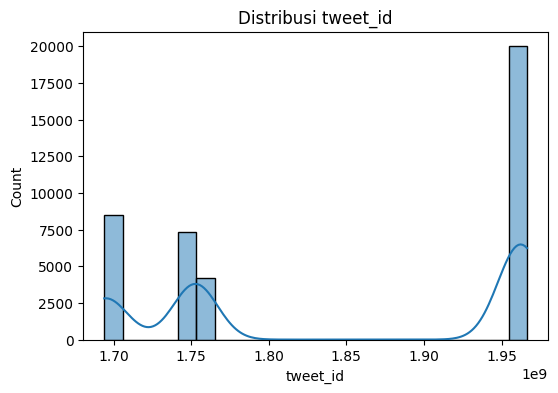

In [10]:
# Distribusi fitur numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

C:\Users\erlys\AppData\Local\Temp\ipykernel_31928\564096965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["sentiment"], palette="viridis", legend=False)


<Axes: xlabel='count', ylabel='sentiment'>

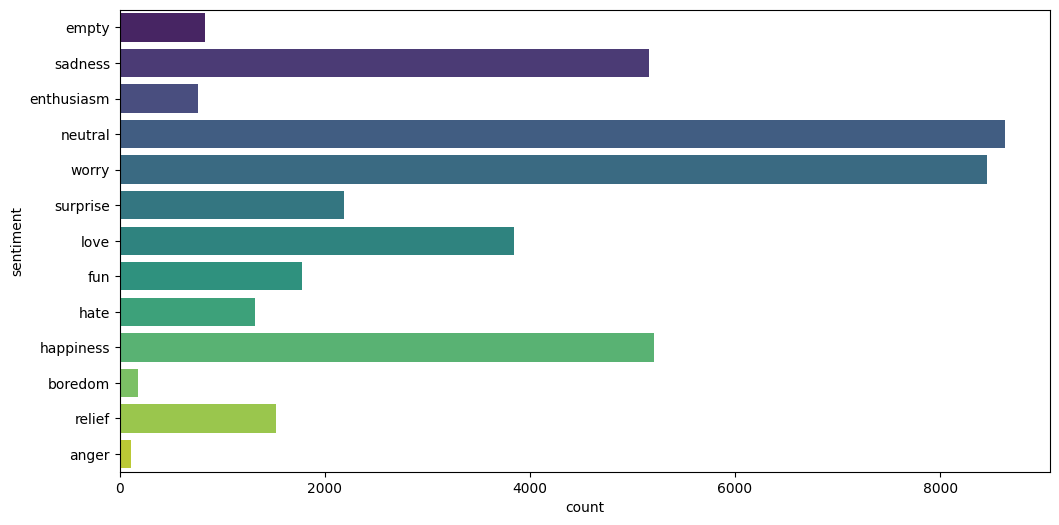

In [11]:
plt.figure(figsize = (12,6))
sns.countplot(df["sentiment"], palette="viridis", legend=False)

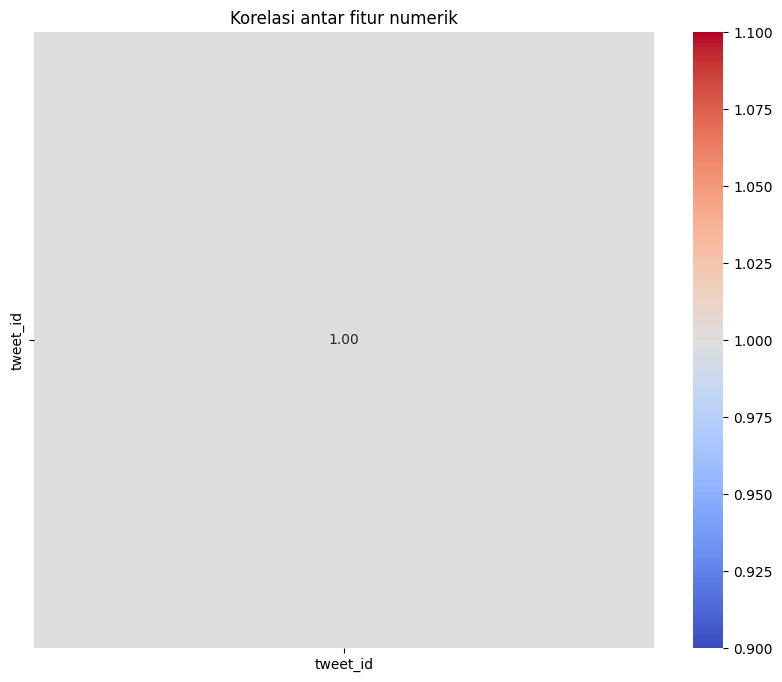

In [12]:
#Korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi antar fitur numerik")
plt.show()

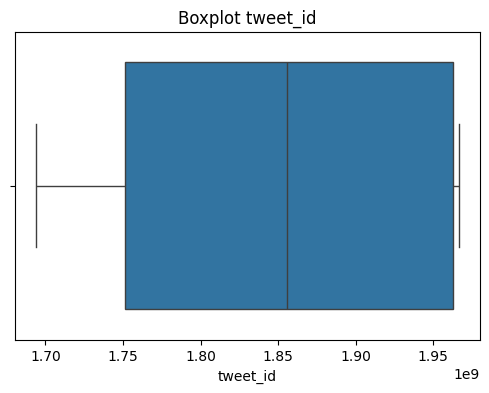

In [13]:
#outlier dengan boxplot
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()


In [14]:
selected_labels = ['empty', 'sad', 'enthusiasm', 'neutral', 'happiness']
filtered_data = df[df['sentiment'].isin(selected_labels)]

In [15]:
filtered_data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
10,1956969456,neutral,cant fall asleep
22,1956972116,neutral,No Topic Maps talks at the Balisage Markup Con...
...,...,...,...
39992,1753918881,neutral,@jasimmo Ooo showing of your French skills!! l...
39993,1753918892,neutral,"@sendsome2me haha, yeah. Twitter has many uses..."
39994,1753918900,happiness,Succesfully following Tayla!!
39995,1753918954,neutral,@JohnLloydTaylor


C:\Users\erlys\AppData\Local\Temp\ipykernel_31928\2045582400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_data['sentiment'], order=filtered_data['sentiment'].value_counts().index, palette="viridis")


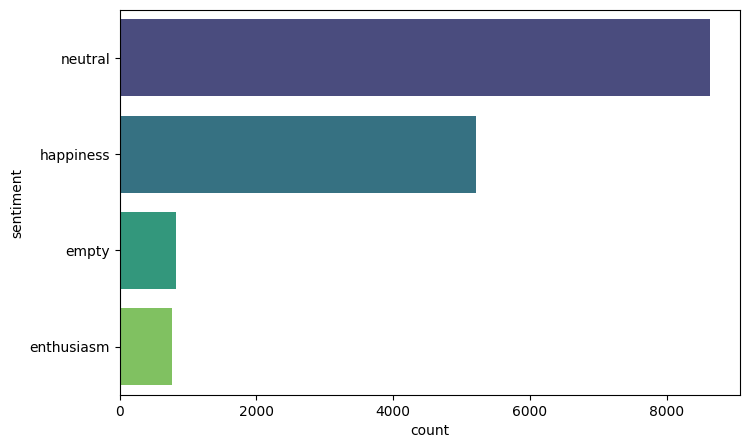

In [16]:
#Distribusi label setelah pemfilteran
plt.figure(figsize=(8, 5))
sns.countplot(y=filtered_data['sentiment'], order=filtered_data['sentiment'].value_counts().index, palette="viridis")
plt.show()

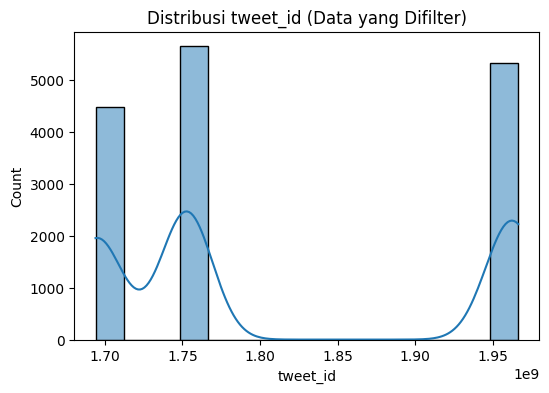

In [17]:
# Visualisasi fitur numerik (jika ada fitur numerik dalam data)
numerical_features = filtered_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(filtered_data[col], kde=True)
    plt.title(f"Distribusi {col} (Data yang Difilter)")
    plt.show()

### Preprocessing Data

In [18]:
# Initialize tools
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [19]:
def preprocess_text(text):
    # Step 1: Hapus karakter tidak diinginkan (URLs, mentions, special characters)
    text = re.sub(r"http\S+|https?:\/\/\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)  # Remove mentions and hashtags
    text = re.sub(r"&[a-z]+;", "", text)  # Remove HTML entities
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove non-alphabetic characters

    # Step 2: Lowercasing
    text = text.lower()

    # Step 3: Tokenization
    tokens = word_tokenize(text)

    # Step 4: Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5a: Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Step 5b: Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Gabungkan token kembali menjadi string
    return " ".join(tokens)

In [20]:
# Apply preprocessing to the "content" column
df['processed_content'] = df['content'].apply(preprocess_text)

# Save the processed data to a new file
output_path = 'tweets_emotions_processed.csv'
df.to_csv(output_path, index=False)

print(f'Preprocessed data saved to {output_path}')

Preprocessed data saved to tweets_emotions_processed.csv
